In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hr_employee_churn_data.csv")

In [3]:
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
data.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
empid                    14999 non-null int64
satisfaction_level       14997 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [6]:
print(data.isnull().sum())

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64


In [7]:
#data.dropna(inplace=True)    #if missing values are less
data.shape
#imputing data with mean value
data.fillna(data.mean(), inplace=True)

In [8]:
print(data.isnull().sum())

empid                    0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64


In [9]:
data['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [11]:
data['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [12]:
data['salary'].value_counts()    #Can use Label encoding to give values acc to rank

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
data['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data['salary'] = labelEncoder.fit_transform(data['salary'])

In [15]:
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,1,1
1,2,0.80,0.86,5,262,6,0,0,2,1
2,3,0.11,0.88,7,272,4,0,0,2,1
3,4,0.72,0.87,5,223,5,0,0,1,1
4,5,0.37,0.52,2,159,3,0,0,1,1


## Feature Selection

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

X = data.iloc[:, 1:8]
Y = data.iloc[:, 9]
#apply SelectKBest class to extract top 3 best features
bestFeatures = SelectKBest(score_func=chi2, k=7)
fit = bestFeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
print(featureScores)

                       0           0
0     satisfaction_level  227.936814
1        last_evaluation    0.026464
2         number_project    3.390205
3   average_montly_hours  945.588933
4     time_spend_company  191.708547
5          Work_accident  306.737710
6  promotion_last_5years   56.044865


[0.26934796 0.12500422 0.2329019  0.16595245 0.18779522 0.01587805
 0.0031202 ]


C:\Users\rraj1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


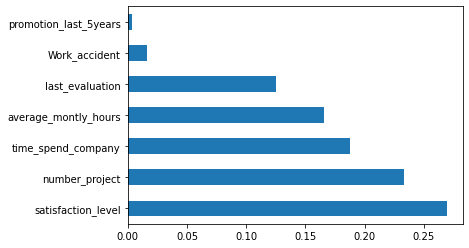

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
featImp = ExtraTreesClassifier()
featImp.fit(X,Y)
print(featImp.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(featImp.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

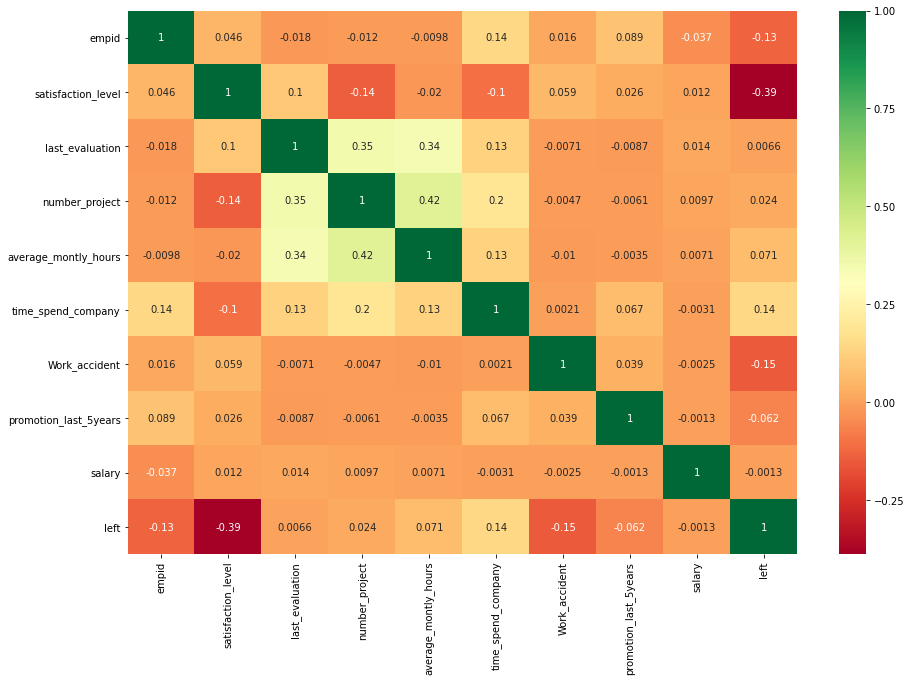

In [18]:
corrmat = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

## Model Building

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In [21]:
#Decision Tree
tree_Classifier = DecisionTreeClassifier(max_leaf_nodes=10, max_features=3, max_depth=15)
tree_Classifier.fit(X_train,Y_train)
pred_tree = tree_Classifier.predict(X_test)

In [22]:
accuracy_score(pred_tree,Y_test)

0.9531111111111111

In [23]:
roc_auc_score(pred_tree,Y_test)

0.9277112591239554

In [24]:
confusion_matrix(pred_tree,Y_test)

array([[3329,   78],
       [ 133,  960]], dtype=int64)

In [25]:
#Random Forest
RF_Classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy')
RF_Classifier.fit(X_train,Y_train)
pred_rf = RF_Classifier.predict(X_test)

In [26]:
accuracy_score(pred_rf,Y_test)

0.9871111111111112

In [27]:
roc_auc_score(pred_rf,Y_test)

0.9867554410080185

In [28]:
confusion_matrix(pred_rf,Y_test)

array([[3448,   44],
       [  14,  994]], dtype=int64)